In [3]:
!pip install gender-guesser
!pip install -U pip
!pip install pytesseract
!pip install sentence-transformers

  Using cached sentence_transformers-2.2.0-py3-none-any.whl
  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
  Using cached huggingface_hub-0.5.1-py3-none-any.whl (77 kB)
  Using cached transformers-4.18.0-py3-none-any.whl (4.0 MB)
  Using cached tokenizers-0.12.1.tar.gz (220 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [51 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-11.0-arm64-cpython-39
      creating build/lib.macosx-11.0-arm64-cpython-39/tokenizers
      copying py_src/tokenizers/__init__.py -> build/lib.macosx-11.0-arm64-cpython-39/tokenizers
      creating build/lib.macosx-11.0-arm64-cpython-39/tokenizers/models
      copying py_src/tokenizers/models/__in

In [1]:
import pandas as pd
import numpy as np
# CV sur images de film
# Producteurs
# Rapports de l'asso 50/50
# Cinégalités

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

Downloading: 100%|██████████| 190/190 [00:00<00:00, 87.6kB/s]
Downloading: 100%|██████████| 3.69k/3.69k [00:00<00:00, 486kB/s]
Downloading: 100%|██████████| 229/229 [00:00<00:00, 12.3kB/s]
Downloading: 100%|██████████| 90.9M/90.9M [00:07<00:00, 12.8MB/s]
Downloading: 100%|██████████| 53.0/53.0 [00:00<00:00, 8.75kB/s]
Downloading: 100%|██████████| 112/112 [00:00<00:00, 41.5kB/s]
Downloading: 100%|██████████| 466k/466k [00:00<00:00, 1.08MB/s]
Downloading: 100%|██████████| 314/314 [00:00<00:00, 72.1kB/s]
Downloading: 100%|██████████| 232k/232k [00:00<00:00, 702kB/s] 


In [33]:
df_bechdel = pd.read_json("bechdel_data.json")
df_tmdb = pd.read_json("tmdb_data.json")
df_tmdb["imdbid"] = df_tmdb["imdb_id"].str[2:]
df = pd.merge(df_bechdel, df_tmdb, "left", "imdbid")
df = df[df['overview'].notna()]

In [35]:
sentences = model.encode(df["overview"].values)
#sentences = model.encode(df["overview"].values)

In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(sentences)

n_PCA = 5

pca = PCA(n_components=n_PCA)
out = pca.fit_transform(X)

In [44]:
for i in range(n_PCA):
    df["PCA_"+str(i)] = pd.Series(out[:, i])

In [107]:
df[df["adult"] == True]

year         title_x   imdbid  id_x  rating adult  \
1927  2007  Hungry Bitches  1765847  9352       3  True   
2445  1972     Deep Throat  0068468  6811       3  True   

                         backdrop_path belongs_to_collection   budget  \
1927                              None                  None      0.0   
2445  /rs4tWRzYtwP4BHwswB4SXrvjQhL.jpg                  None  25000.0   

                              genres  ... Is_Documentary  Is_History  \
1927                              []  ...          False       False   
2445  [{'id': 35, 'name': 'Comedy'}]  ...          False       False   

     Is_Adventure Is_Western Is_Crime Is_Animation  Is_Family Is_Music  \
1927        False      False    False        False      False    False   
2445        False      False    False        False      False    False   

     Is_TV Movie Is_Mystery  
1927       False      False  
2445       False      False  

[2 rows x 51 columns]

In [55]:

df["collection"] = (df["belongs_to_collection"] is None)

df["belongs_to_collection"]

In [90]:
genres_global = []

def parse_genres(x):
    global genres_global
    if x is np.nan:
        return []
    genres = []
    for d in x:
        genres.append(d['name'])
        if d['name'] not in genres_global:
            genres_global.append(d['name'])
    return genres

df["Genres"] = df["genres"].apply(parse_genres)

print(genres_global)

for genre in genres_global:
    df[f"Is_" + genre] = df["Genres"].apply(lambda x: genre in x)

columns_to_remove = ["title_x", "imdbid", "id_x", "backdrop_path", "genres", "Genres", "budget", "belongs_to_collection", "budget", "homepage", "id_y", "original_language", 
                     "original_title", ]

df.drop(columns=columns_to_remove)

['Horror', 'Science Fiction', 'Comedy', 'Romance', 'War', 'Drama', 'Thriller', 'Action', 'Fantasy', 'Documentary', 'History', 'Adventure', 'Western', 'Crime', 'Animation', 'Family', 'Music', 'TV Movie', 'Mystery']


In [96]:
df.columns

Index(['year', 'title_x', 'imdbid', 'id_x', 'rating', 'adult', 'backdrop_path',
       'belongs_to_collection', 'budget', 'genres', 'homepage', 'id_y',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_y', 'video',
       'vote_average', 'vote_count', 'collection', 'Genres', 'Is_Horror',
       'Is_Science Fiction', 'Is_Comedy', 'Is_Romance', 'Is_War', 'Is_Drama',
       'Is_Thriller', 'Is_Action', 'Is_Fantasy', 'Is_Documentary',
       'Is_History', 'Is_Adventure', 'Is_Western', 'Is_Crime', 'Is_Animation',
       'Is_Family', 'Is_Music', 'Is_TV Movie', 'Is_Mystery'],
      dtype='object')

In [101]:
df["overview"].iloc[0]
    

'A rash of bizarre murders in New York City seems to point to a group of grotesquely deformed vagrants living in the sewers. A courageous policeman, a photo journalist and his girlfriend, and a nutty bum, who seems to know a lot about the creatures, band together to try and determine what the creatures are and how to stop them.'

In [38]:
pd.merge(df_bechdel, df_tmdb, how = "left", on = "id")

year                   title_x   imdbid    id  rating adult  \
0     1984                  C.H.U.D.  0087015  9327       2   NaN   
1     1955    Les grandes manoeuvres  0048133  7878       3   NaN   
2     1964        King &amp; Country  0058263  3250       0   NaN   
3     2002          Coast Guard, The  0341384  3163       1   NaN   
4     1965           Daikaiju Gamera  0059080  6428       2   NaN   
...    ...                       ...      ...   ...     ...   ...   
8470  1954                    Gojira  0047034  5505       1   NaN   
8471  2005  Devil&#39;s Rejects, The  0395584  3628       3   NaN   
8472  2008       Solo Quiero Caminar  1078600  7381       3   NaN   
8473  2009        Le h&eacute;risson  1442519  2439       3   NaN   
8474  1960      Les yeux sans visage  0053459   656       3   NaN   

     backdrop_path belongs_to_collection  budget genres  ... release_date  \
0              NaN                   NaN     NaN    NaN  ...          NaN   
1              NaN                   NaN     NaN    NaN  ...          NaN   
2              NaN                   NaN     NaN    NaN  ...          NaN   
3              NaN                   NaN     NaN    NaN  ...          NaN   
4              NaN                   NaN     NaN    NaN  ...          NaN   
...            ...                   ...     ...    ...  ...          ...   
8470           NaN                   NaN     NaN    NaN  ...          NaN   
8471           NaN                   NaN     NaN    NaN  ...          NaN   
8472           NaN                   NaN     NaN    NaN  ...          NaN   
8473           NaN                   NaN     NaN    NaN  ...          NaN   
8474           NaN                   NaN     NaN    NaN  ...          NaN   

     revenue runtime spoken_languages status  tagline title_y video  \
0        NaN     NaN              NaN    NaN      NaN     NaN   NaN   
1        NaN     NaN              NaN    NaN      NaN     NaN   NaN   
2        NaN     NaN              NaN    NaN      NaN     NaN   NaN   
3        NaN     NaN              NaN    NaN      NaN     NaN   NaN   
4        NaN     NaN              NaN    NaN      NaN     NaN   NaN   
...      ...     ...              ...    ...      ...     ...   ...   
8470     NaN     NaN              NaN    NaN      NaN     NaN   NaN   
8471     NaN     NaN              NaN    NaN      NaN     NaN   NaN   
8472     NaN     NaN              NaN    NaN      NaN     NaN   NaN   
8473     NaN     NaN              NaN    NaN      NaN     NaN   NaN   
8474     NaN     NaN              NaN    NaN      NaN     NaN   NaN   

     vote_average vote_count  
0             NaN        NaN  
1             NaN        NaN  
2             NaN        NaN  
3             NaN        NaN  
4             NaN        NaN  
...           ...        ...  
8470          NaN        NaN  
8471          NaN        NaN  
8472          NaN        NaN  
8473          NaN        NaN  
8474          NaN        NaN  

[8475 rows x 29 columns]

In [3]:
import gender_guesser.detector as gender
d = gender.Detector()
print(d.get_gender(u""))

unknown


In [4]:
df.columns

Index(['year', 'title', 'imdbid', 'id', 'rating'], dtype='object')

In [9]:
from PIL import Image
import cv2
import pytesseract
img = Image.open('titanic.jpg')

LEONARDO DiCaprio “KATE WINSLET

NOTHING ON EARTH é
COULD COME BETWEEN THEM.

TITAN IC.

‘ "From THE Director OF ‘ALIENS,’ ‘T2’ AND ‘TRUE Lies? ¢




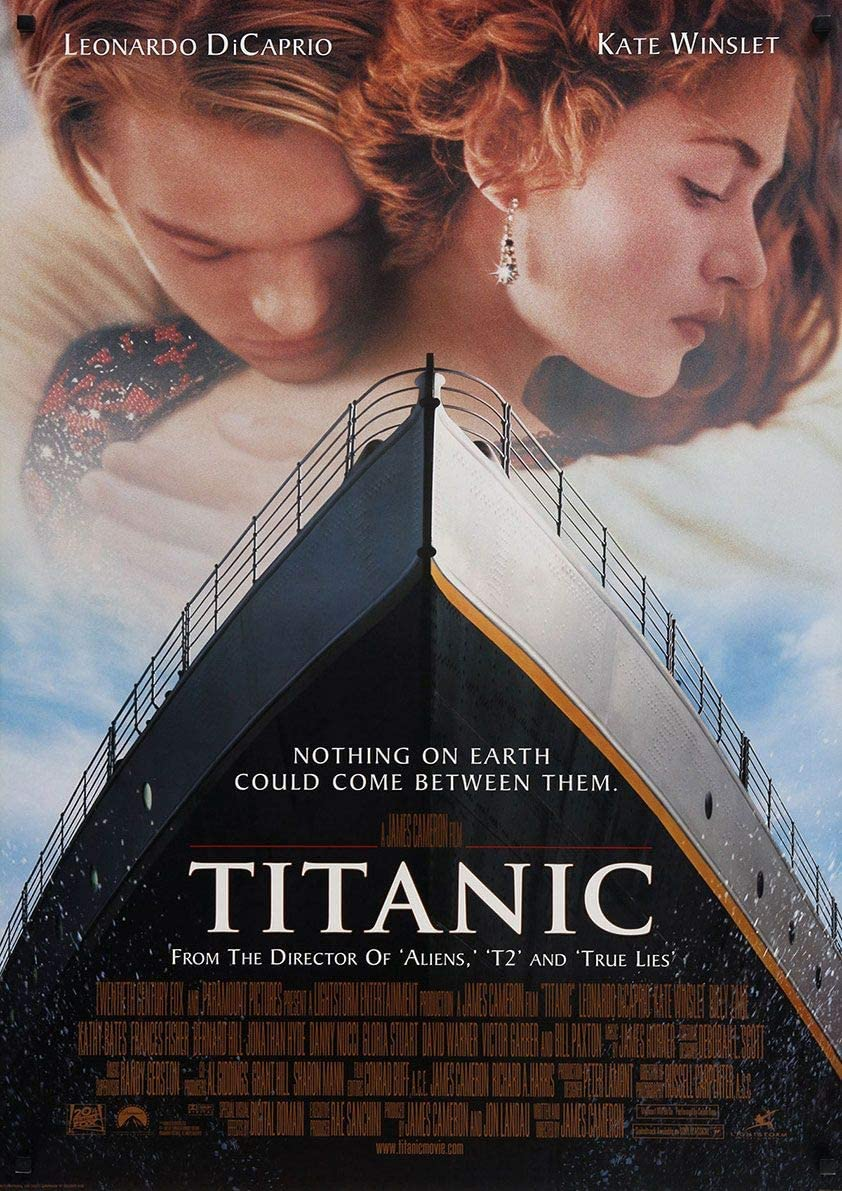

In [8]:
print(pytesseract.image_to_string(img))
img

['', '', '', '', '  ', ' ', '', '   ', '', '   ', '', '', '', 'LEONARDO', 'DiCaprio', '“KATE', 'WINSLET', '', '', '', '  ', '', '', '', 'NOTHING', 'ON', 'EARTH', 'é', '', 'COULD', 'COME', 'BETWEEN', 'THEM.', '', '', '', 'TITAN', 'IC.', '', '', '', '‘', '"From', 'THE', 'Director', 'OF', '‘ALIENS,’', '‘T2’', 'AND', '‘TRUE', 'Lies?', '¢', '', '', '', '     ', '', '']
['', '', '', '', '  ', ' ', '', '   ', '', '   ', '', '', '', 'LEONARDO', 'DiCaprio', '“KATE', 'WINSLET', '', '', '', '  ', '', '', '', 'NOTHING', 'ON', 'EARTH', 'é', '', 'COULD', 'COME', 'BETWEEN', 'THEM.', '', '', '', 'TITAN', 'IC.', '', '', '', '‘', '"From', 'THE', 'Director', 'OF', '‘ALIENS,’', '‘T2’', 'AND', '‘TRUE', 'Lies?', '¢', '', '', '', '     ', '', '']
['', '', '', '', '  ', ' ', '', '   ', '', '   ', '', '', '', 'LEONARDO', 'DiCaprio', '“KATE', 'WINSLET', '', '', '', '  ', '', '', '', 'NOTHING', 'ON', 'EARTH', 'é', '', 'COULD', 'COME', 'BETWEEN', 'THEM.', '', '', '', 'TITAN', 'IC.', '', '', '', '‘', '"From', 'THE

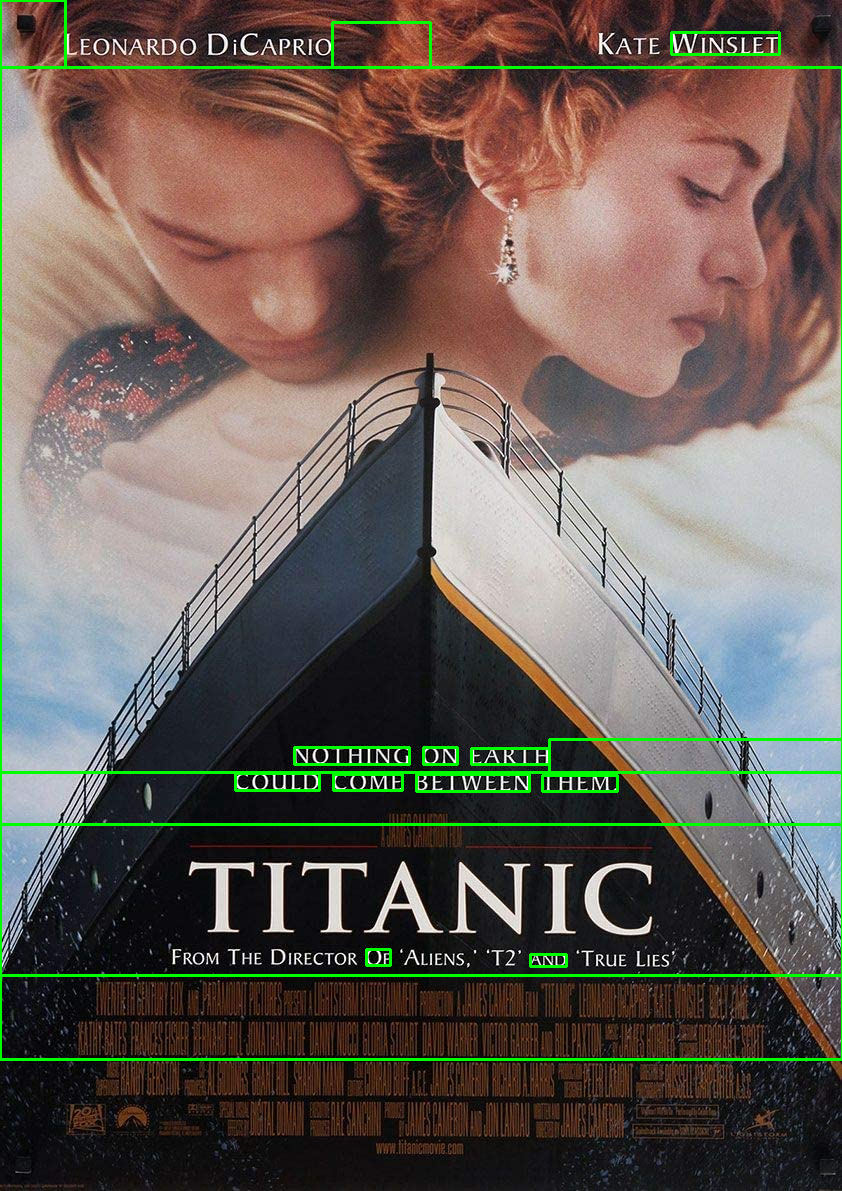

In [32]:
min_conf = 90

data = pytesseract.image_to_data(img, output_type='dict')
boxes = len(data['level'])
array_img = np.asarray(img)
for i in range(boxes):
    
    (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
    conf = int(float(data["conf"][i]))
    if conf > min_conf:
        print(data["text"])
        array_img = cv2.rectangle(array_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

Image.fromarray(array_img)

In [34]:
from pytesseract import pytesseract
pytesseract.run_tesseract('titanic.jpg', 'output', lang=None, config="hocr")

TypeError: run_tesseract() missing 1 required positional argument: 'extension'

In [46]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "notebook_connected"

df["rating_str"] = df["rating"].astype(str)
px.scatter(df, x = "year", y = "vote_average", color = "rating_str", hover_data=["title_x"])


In [32]:

px.scatter(df, x = "year", y = "original_language", color = "rating", hover_data=["title_x", "year"])

In [45]:

px.scatter(df, x = "PCA_0", y = "PCA_1", color = "rating", hover_data=["title_x", "year"])